# Convolutional Neural Networks (CNNs)

ML Laboratory 04

# 1. Objective

Students should understand and be able use some basic pretrained CNN
models available in Matlab

# 2. CNN networks

CNNs are multilayer networks adapted for image processing, which use the
**convolution** operation extensively.

## 2.1 Starting points

1.  The layers in a normal multilayer perceptron network (MLP) are
    **fully-connected**: each output value is a combination of all
    inputs
2.  Each full-connected layer is a **full (dense) matrix**

Problems:

1.  Images are large: 1 Mexapixel color image = 3 million values
2.  Fully-connected layers have **huge** size (the number of parameters
    in fully-connected layers is huge).

**Example**: Consider a layer with input size = 300 x 300 color pixels,
and output size equivalent to 150 x 150 color pixels. How many
parameters does this layer have?

## 2.2 Convolution

DSP deja-vu vibes: $$y[n] = \sum_k x[n-k] h[k]$$

-   Some videos here: a **kernel** with fixed coefficients $h[k]$ is
    slided over the input $x[n]$ and computes the output as a linear
    combination of the surrounding input samples

Key points:

-   Convolution has been used since forever in signal and image
    processing for **extracting features** (edges, frequency bands, etc)

-   Convolution is a kind of matrix multiplication, with an almost
    sparse matrix of a special form (“circulant” or “Toeplitz”)

-   Each output value depends only on the surrounding pixels

## 2.3 Convolutional Neural Networks

-   The basic unit is now **a layer**

-   The data is viewed as **tensors**: 3D cubes of data (like a
    three-dimensional matrix)

-   Each layer takes as input an $M_1 \times N_1 \times C_1$ tensor and
    produces an output $M_2 \times N_2 \times C_2$ tensor

-   We don’t think of individual neurons anymore. Each neuron in a
    convolutional layer does exactly the same operation as the others,
    with the same weights, but “sees” just one small part of the input
    image

## 2.4 Architecture of a CNN

**AlexNet:**

\[1\] Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E.
(2017-05-24). “ImageNet classification with deep convolutional neural
networks” (PDF). Communications of the ACM. 60 (6): 84–90.
doi:10.1145/3065386. ISSN 0001-0782.

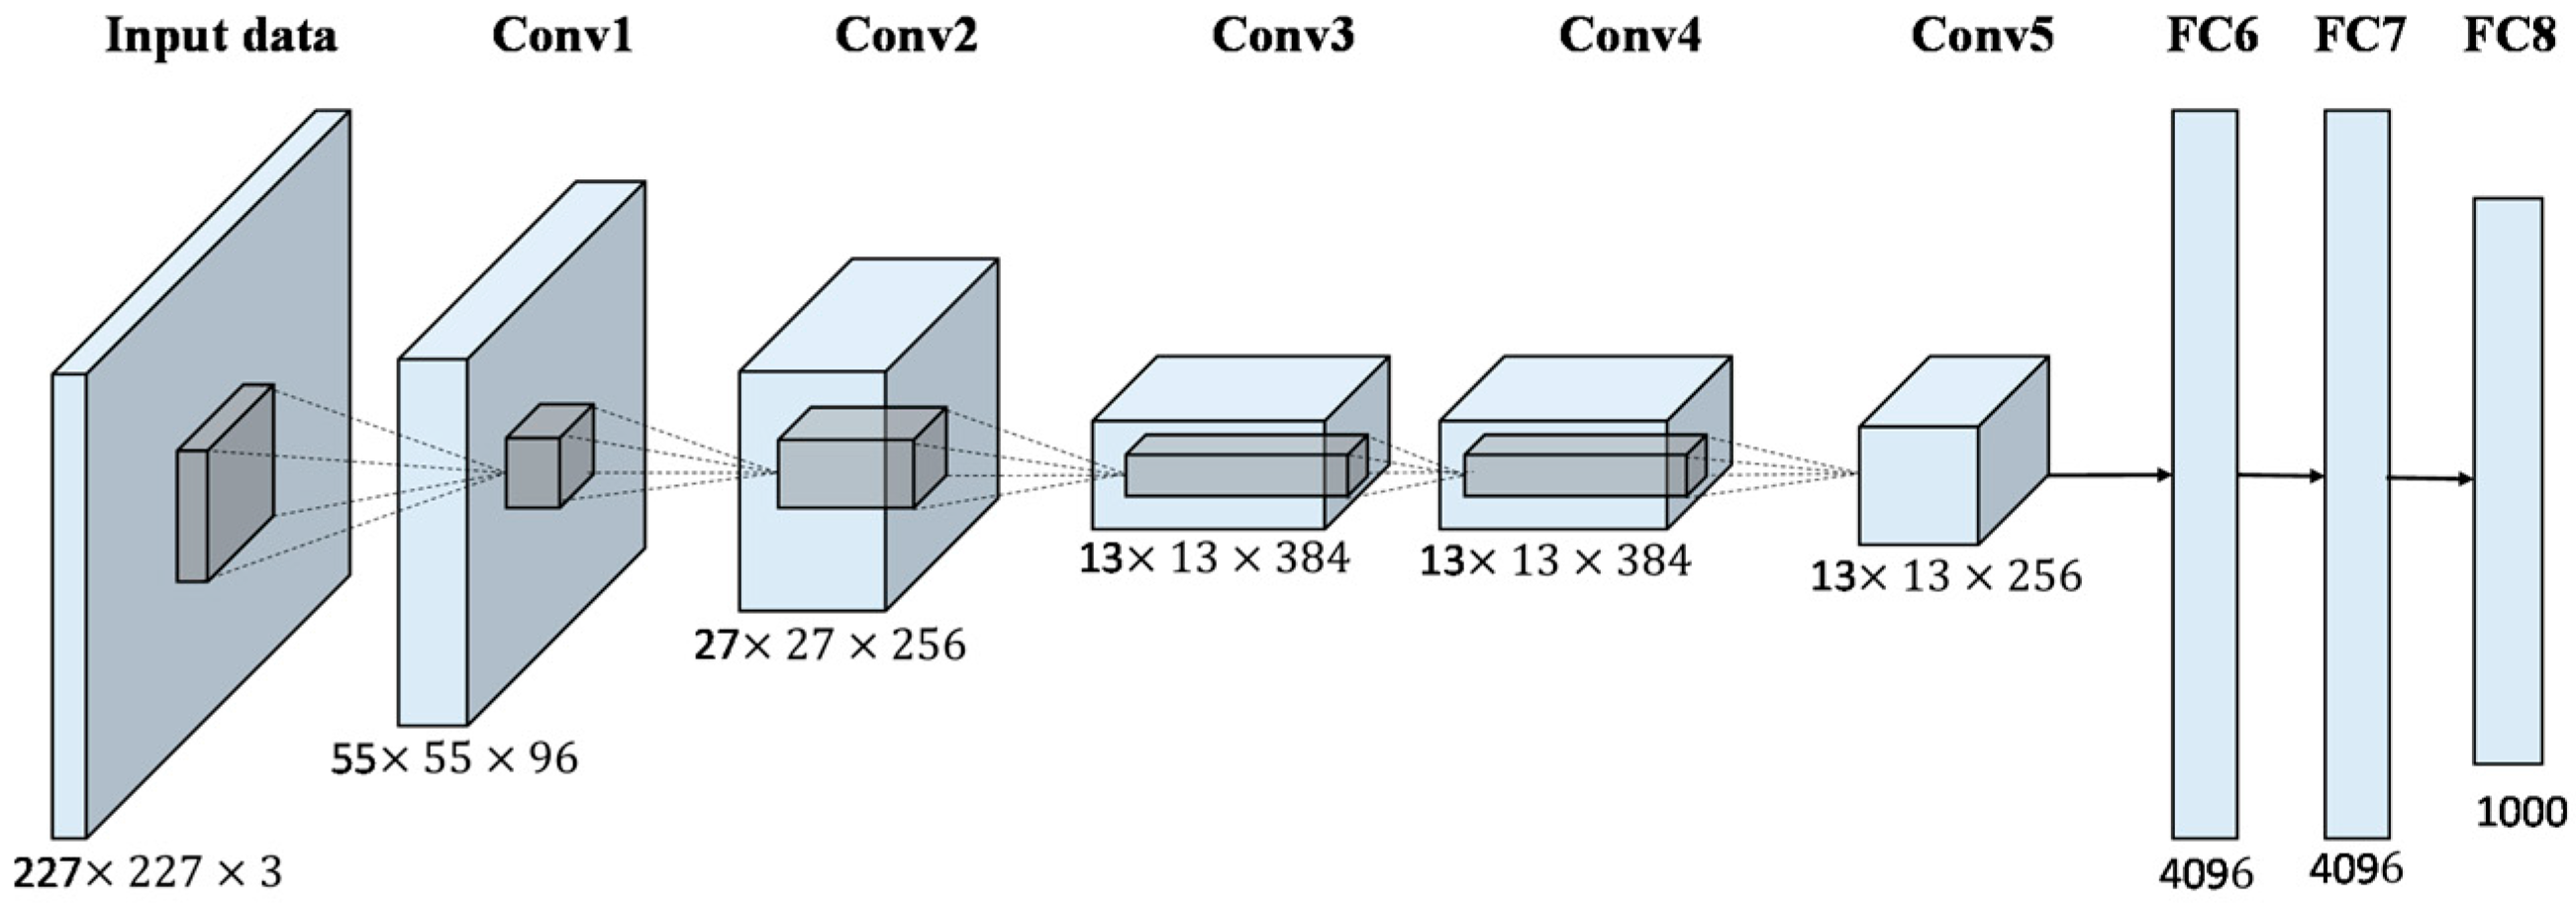

## 2.5 Layer types

Open the AlexNet model in Matlab and look at the architecture directly.

``` matlab
net = alexnet('Weights','imagenet')
analyzeNetwork(net)  % or double-click `net` in the Workspace
```

Layer types:

-   Convolutional
-   Activation
-   Pooling (MaxPooling)
-   Fully connected (e.g. like in multilayer perceptron)
-   Softmax activation to get probability-like scores (like in
    multilayer perceptron)
-   Other optional stuff: normalization, dropout, batch normalization
    etc

A CNN can be viewed as a feature extractor + classificator:

-   The output layers are very similar to multilayer perceptron:
    fully-connected layers + softmax
-   The first part, with the convolution layers, is a kind of **feature
    extractor**

## 2.6 The model

A CNN has a fixed arcihtecture composed of several layers. For typical
networks, the architecture is described in the accompanying papers.

**Inputs**:

-   a color image represented as a tensor $X$ of size
    $L_1 \times L_2 \times 3$

**Outputs** (assuming one-hot encoding):

-   a vector $\hat{y}$ which should be understood as scores/probability
    of belonging in each class
-   the **location of the maximum** value gives the predicted class

## 2.7 The model parameters

The model parameters are the parameters of the layers:

-   the filter coefficients in the convolutional layers

-   the weights in the fully-connected layers

The number of parameters of the convolutional layers is **much smaller**
than for fully-connected layers.

## 2.8 The cost function

For classification, the **cross-entropy** is typically used. This is
exactly the same loss function used in MLP networks.

For a single input:

$$L(y, \hat{y}) = - y_1 \log{\hat{y_1}} - \dots - y_n \log{\hat{y_n}} = -\log{\hat{y_{class}}},$$

where $\hat{y_{class}}$ is the model’s predicted probability for the
true class of the input.

For multiple inputs: do the average of all
$$J = \frac{1}{N} \sum_i L(y^i, \hat{y}^i)$$

## 2.9 Training

Training is done with **backpropagation** and gradient descent (or some
variant of it).

**Backpropagation** = the technique to compute the derivatives of $J$
with respect to all parameters in the network.

This is the same approach used in multilayer perceptron (MLP) networks

# 3. Matlab tools and functions for working with CNNs

There are lots of new functions and tools in Matlab for using Deep
Neural Networks, introduced in the last 2-3 years. There are also Matlab
courses and tutorials on how to use them.

But anyone who is serious on this topic should use the Python frameworks
(Pytorch, Tensorflow/Keras).

## 3.1 Deep Network Designer

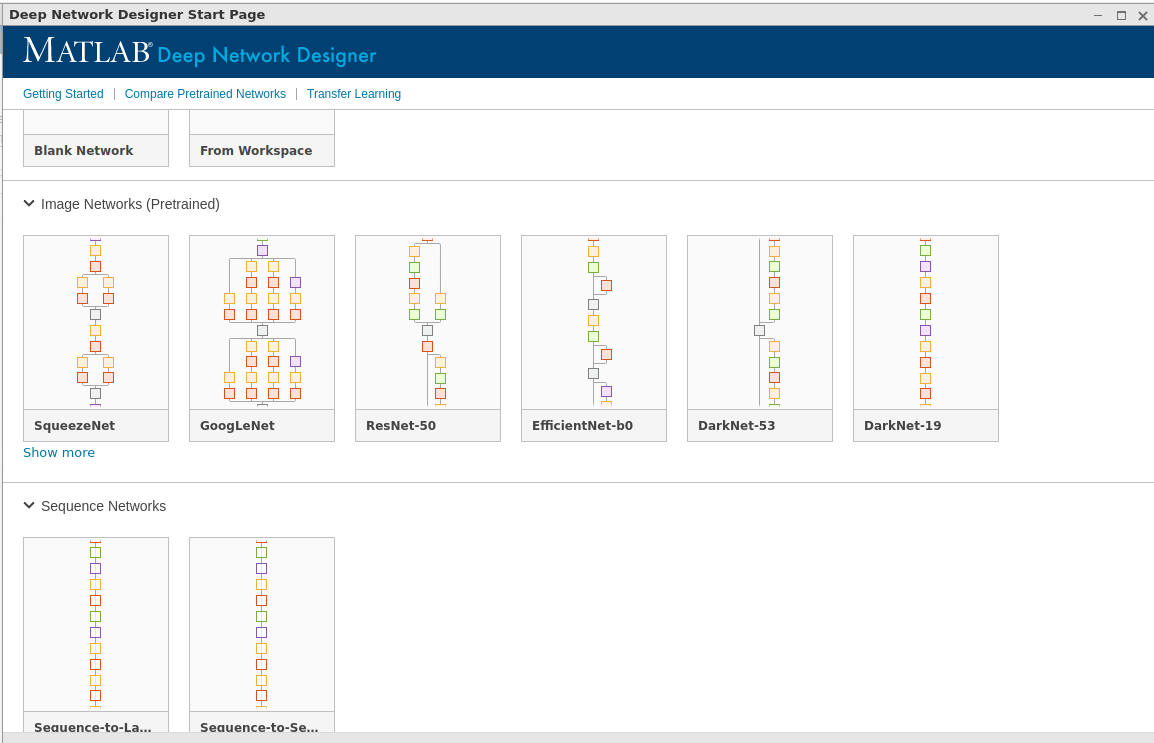

## 3.2 Other frameworks besides Matlab

The most used deep learning frameworks are written in Python:

-   Tersorflow + Keras
-   Pytorch
-   …

# 4. Walkthroughs

We go step by step through the following Matlab examples:

1.  [Classify Image Using
    GoogLeNet](https://www.mathworks.com/help/deeplearning/ug/classify-image-using-googlenet.html)
2.  [Transfer Learning with Deep Network
    Designer](https://www.mathworks.com/help/deeplearning/ug/transfer-learning-with-deep-network-designer.html)
    -   alternative: [Transfer Learning Using
        AlexNet](https://www.mathworks.com/help/deeplearning/ug/transfer-learning-using-alexnet.html)
3.  [Create Simple Deep Learning Network for
    Classification](https://www.mathworks.com/help/deeplearning/ug/create-simple-deep-learning-network-for-classification.html)

Additional links:

-   DeepLearning OnRamp:
    <https://matlabacademy.mathworks.com/details/deep-learning-onramp/deeplearning>

# 5. Practical work

## 5.1 Exercise 1 - Play with pretrained networks

1.  Load the AlexNet model with pretrained weights on the ImageNet
    database. Open the model and examine the architecure.

    -   How many parameters does the first convolutional layer have?
    -   How many parameters does each trainable layer have? (trainable =
        convolutional or fully-connected)
    -   What is the share of the fully-connected layers in the total
        number of parameters?

2.  Compare other networks (GoogLeNet, Resnet-18, Mobile-net v2) with
    AlexNet:

    -   which has more/less layers?
    -   which has bigger/smaller fully-connected layers at the end?

3.  Play with GoogLeNet and AlexNet. Download an image of a dog from the
    Internet and classify it. Does it work?

    *Note*: The networks were pretrained on the ImageNet dataset, with
    1000 image categories, each category having 1000 images. The
    ImageNet class names can be found
    [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

    -   What is the second highest predicted score?

4.  Using AlexNet with the image above, visualize the internal
    activations of the layers ‘conv1’, ‘conv2’, ‘fc7’ and ‘prob’ inside
    the network.

    -   What are their shapes?

    Use the following code sample:

    ``` matlab
    % `net` is the model
    % `im` is the input image
    % 'conv1' is the layer name
    act1 = activations(net,im,'conv1');

    % Nice plotting
    sz = size(act1);
    act1 = reshape(act1,[sz(1) sz(2) 1 sz(3)]);
    I = imtile(mat2gray(act1),'GridSize',[8 8]);
    imshow(I)
    ```

    The sample code is taken from here:
    <https://www.mathworks.com/help/deeplearning/ug/visualize-activations-of-a-convolutional-neural-network.html>

## 5.2 Exercise 2 - Transfer Learning to classify Cola vs Pepsi

Use transfer learning to train AlexNet (or GoogLeNet) to classify images
of Pepsi vs CocaCola beverages.

The dataset is in the file `Data_PepsiCola.zip,` downloaded from here:
<https://www.kaggle.com/datasets/die9origephit/pepsi-and-cocacola-images>

1.  Download and unzip images, look through them
2.  Use the training data to train the network
3.  Test the results with some of the images from the dataset.

## 5.3 Exercise 3 - Add a new layer and retrain

1.  In DeepNetworkDesigner, and remove one convolutional layer (+ the
    pooling layer after it) from the middle part of AlexNet. Retrain the
    whole network on the Pepsi/Cola dataset (it may take some time).

2.  Add one extra convolutional layer (+ pooling) in the middle part of
    AlexNet. Retrain the whole network on the Pepsi/Cola dataset (it may
    take some time).

# 6. Final questions

TBD